# Titanic - Machine Learning From Disaster
This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

In [494]:
# Import libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, GridSearchCV

import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## Data Loading

Load the train data

In [495]:
df_train = pd.read_csv("input/train.csv")
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Load test data

In [496]:
df_test = pd.read_csv("input/test.csv")
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Feature Engineering

### Find Missing Values

In [497]:
# Find missing values in train data
print("Train Data:")
print(df_train.isnull().sum())

# Find missing values in test
print("\nTest Data:")
print(df_test.isnull().sum())

Train Data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Test Data:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Age, Fare, Cabin, Embarked has missing values.

### Age Feature

Analyze "Age" with "Pclass" and "Sex".

In [498]:
age_val = df_train.groupby(["Pclass", "Sex"])["Age"].mean()
age_val

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

Fill "Age" with mean values

In [499]:
# Fill "Age" on train data
for row in range(df_train.shape[0]):
    if pd.isna(df_train.loc[row, "Age"]):
        df_train.loc[row, "Age"] = age_val[df_train.loc[row, "Pclass"]][df_train.loc[row, "Sex"]]
print("Train Data: ", df_train["Age"].isna().sum())

# Fill "Age" on test data
for row in range(df_test.shape[0]):
    if pd.isna(df_test.loc[row, "Age"]):
        df_test.loc[row, "Age"] = age_val[df_test.loc[row, "Pclass"]][df_test.loc[row, "Sex"]]
print("Test Data: ", df_test["Age"].isna().sum())

Train Data:  0
Test Data:  0


### Fare feature

Analyze Fare feature

In [500]:
df_test[df_test['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


No family, Embarked: S, Pclass: 3 and Sex: male

Fill missing value

In [501]:
df_test.loc[152, "Fare"] = df_train[(df_train["Pclass"] == 3) & (df_train["Sex"] == "male") & (df_train["SibSp"] == 0) & (df_train["Embarked"] == "S")].loc[:, "Fare"].mean()
df_test["Fare"].isna().sum()

0

### Embarked Feature

Analyze Embarked feature

In [502]:
df_train[df_train["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Find the most frequent value in "Embarked".

In [503]:
df_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [504]:
df_train.loc[61, "Embarked"] = 'S'
df_train.loc[829, "Embarked"] = 'S'
df_train["Embarked"].isna().sum()

0

### Cabin Feature

Analyze Cabin feature

In [505]:
df_train["Cabin"] = df_train["Cabin"].apply(lambda x: x if pd.isna(x) else x[0])
df_train.groupby(["Pclass"])["Cabin"].value_counts()

Pclass  Cabin
1       C        59
        B        47
        D        29
        E        25
        A        15
        T         1
2       F         8
        D         4
        E         4
3       F         5
        G         4
        E         3
Name: Cabin, dtype: int64

Fill missing values in cabin

In [506]:
cabin_value = {1: 'C', 2: 'F', 3: 'G'}

# fill cabin in train data
df_train["Cabin"] = df_train.apply(lambda x: x["Cabin"] if pd.notna(x["Cabin"]) else cabin_value[x["Pclass"]], axis=1)
print(df_train["Cabin"].isna().sum())

# fill cabin in test data
df_test["Cabin"] = df_test.apply(lambda x: x["Cabin"] if pd.notna(x["Cabin"]) else cabin_value[x["Pclass"]], axis=1)
print(df_test["Cabin"].isna().sum())

0
0


### Name Feature

Extract surname from name feature

In [507]:
df_train["SurName"] = df_train["Name"].apply(lambda x: x.split(",")[1].strip().split(".")[0])
df_train.groupby("SurName")["Survived"].count()

SurName
Capt              1
Col               2
Don               1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           40
Miss            182
Mlle              2
Mme               1
Mr              517
Mrs             125
Ms                1
Rev               6
Sir               1
the Countess      1
Name: Survived, dtype: int64

Remain, Master, Miss, Mr, Mrs and change others to "other"

In [508]:
df_train["SurName"] = df_train["SurName"].apply(lambda x: x if x in ["Mr", "Mrs", "Master", "Miss"] else "other")
df_train.groupby("SurName")["Survived"].mean()

SurName
Master    0.575000
Miss      0.697802
Mr        0.156673
Mrs       0.792000
other     0.444444
Name: Survived, dtype: float64

Create surname feature in test data

In [509]:
df_test["SurName"] = df_test["Name"].apply(lambda x: x.split(",")[1].strip().split(".")[0])
df_test["SurName"] = df_test["SurName"].apply(lambda x: x if x in ["Mr", "Mrs", "Master", "Miss"] else "other")
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurName
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,G,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,G,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,F,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,G,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,G,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,26.507589,0,0,A.5. 3236,8.0500,G,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,other
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,G,S,Mr
416,1308,3,"Ware, Mr. Frederick",male,26.507589,0,0,359309,8.0500,G,S,Mr


### Create Family Size

Create "family_size" feature in training data using "Parch" and "SibSp".

In [510]:
df_train["family_size"] = df_train.apply(lambda x: x["Parch"] + x["SibSp"], axis=1)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurName,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,G,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,G,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,G,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,F,S,other,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,B,S,Miss,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.75,1,2,W./C. 6607,23.4500,G,S,Miss,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,C,C,Mr,0


Show survival rate with family size.

<AxesSubplot: xlabel='family_size'>

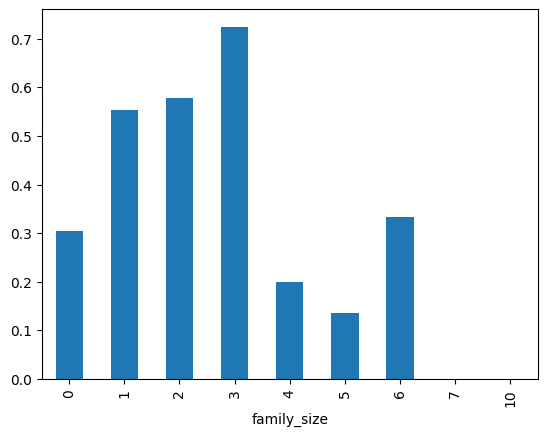

In [511]:
df_train.groupby("family_size")["Survived"].mean().plot.bar()

Create "family_size" feature in testing data

In [512]:
df_test["family_size"] = df_test.apply(lambda x: x["Parch"] + x["SibSp"], axis=1)
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurName,family_size
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,G,Q,Mr,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,G,S,Mrs,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,F,Q,Mr,0
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,G,S,Mr,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,G,S,Mrs,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,26.507589,0,0,A.5. 3236,8.0500,G,S,Mr,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,other,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,G,S,Mr,0
416,1308,3,"Ware, Mr. Frederick",male,26.507589,0,0,359309,8.0500,G,S,Mr,0
